## 은닉층 1개인 신경망을 이용하여 
## 선형회귀 (Linear Regression) 구현

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

#### training data 를 전치행렬 형태로 읽어온다
#### 또한 제목이 있는 1행은 skip 하기 위해 skiprows=1 옵션 기술함

In [2]:
transposed_loaded_data = np.loadtxt('./airplane_train.csv', unpack=True, delimiter=',', skiprows=1)

print(transposed_loaded_data.shape)

(3, 300)


#### 입력데이터와 정답데이터의 관계를 파악하기 위해 그래프를 그려봄
#### 입력이 Speed, Weight 두개이므로 입력데이터를 x1, x2 로 구분함

In [3]:
training_x1_data = transposed_loaded_data[0]  # 전치행렬되기 전의 Speed 열 (column)

training_x2_data = transposed_loaded_data[1]  # 전치행렬되기 전의 Weight 열 (column)

training_t_data = transposed_loaded_data[2]   # 전치행렬되기 전의 정답인 Distance 열 (column)

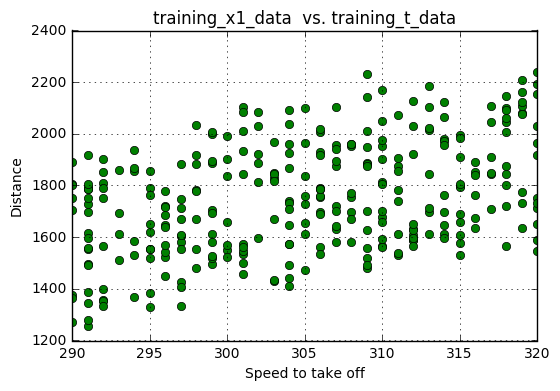

In [4]:
# 녹색(g)에 둥근점(o)으로 시각화

plt.title('training_x1_data  vs. training_t_data')
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.grid()
#plt.xlim(289,321) 
plt.plot(training_x1_data, training_t_data, 'go')

plt.show()

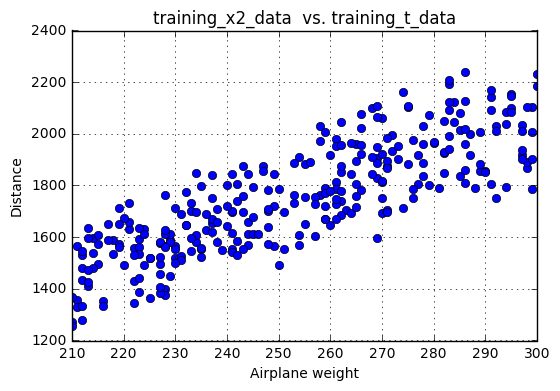

In [5]:
# 파란색(b)에 둥근점(o)으로 시각화

plt.title('training_x2_data  vs. training_t_data')
plt.xlabel('Airplane weight')
plt.ylabel('Distance')
plt.grid()
#plt.xlim(209, 301) 
plt.plot(training_x2_data, training_t_data, 'bo')

plt.show()

#### 입력값과 정답이 큰 값  (>1000) 이므로 데이터 정규화 수행

In [6]:
# normalize function, 0~1 값으로 정규화
def minmax_normalize(data):
    
    min_val = data.min()
    max_val = data.max()
    
    return ( data - min_val ) / ( max_val - min_val ) 

# de-normalize, 0~1 값을 실제 값으로 역 정규화
def minmax_get_denormalize(normalized_data, data_array):
    
    max_val, min_val = data_array.max(), data_array.min()
    
    denormalized_data = normalized_data * (max_val-min_val) + min_val
    
    return denormalized_data

# 데이터 정규화 후, 임의의 값을 0~1 사이의 값으로 정규화 해주는 함수
def minmax_get_normalize(data, data_array):
    
    min_val = data_array.min()
    max_val = data_array.max()
    
    return ( data - min_val ) / ( max_val - min_val ) 

In [7]:
normalized_training_x1_data = minmax_normalize(training_x1_data)

normalized_training_x2_data = minmax_normalize(training_x2_data)

normalized_training_t_data = minmax_normalize(training_t_data)

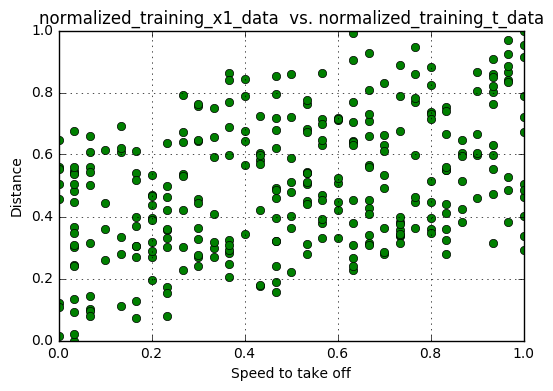

In [8]:
# 녹색(g)에 둥근점(o)으로 시각화

plt.title('normalized_training_x1_data  vs. normalized_training_t_data')
plt.xlabel('Speed to take off')
plt.ylabel('Distance')
plt.grid()
plt.plot(normalized_training_x1_data, normalized_training_t_data, 'go')

plt.show()

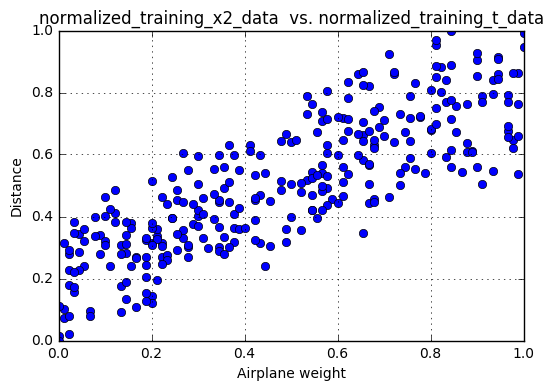

In [9]:
# 파란색(b)에 둥근점(o)으로 시각화

plt.title('normalized_training_x2_data  vs. normalized_training_t_data')
plt.xlabel('Airplane weight')
plt.ylabel('Distance')
plt.grid()
plt.plot(normalized_training_x2_data, normalized_training_t_data, 'bo')

plt.show()

In [10]:
# 학습을 위한 입력데이터, 정답데이터 구성

training_input_data_list = [ [ x1_data for x1_data in normalized_training_x1_data ],
                             [ x2_data for x2_data in normalized_training_x2_data ] ]

training_input_data = np.array(training_input_data_list).reshape(-1,2)  # 리스트 이므로 numpy 변형 후 reshape

training_target_data = normalized_training_t_data.reshape(-1,1)

print('training_input_data.shape = ', training_input_data.shape, ', training_target_data.shape = ', training_target_data.shape)

# test 저장
np.savetxt('./airplane_train_data.csv', training_input_data, delimiter=',')
np.savetxt('./airplane_target_data.csv', training_target_data, delimiter=',')

training_input_data.shape =  (300, 2) , training_target_data.shape =  (300, 1)


In [52]:
# Hyper-Parameter 최적화가 필요하나 학습데이터의 절대량이 부족하여 근사값에 한계가 있음
learning_rate = 1e-5
input_nodes = training_input_data.shape[1]  
hidden_nodes = 40
output_nodes = 1
epochs = 1

In [53]:
# 입력과 출력을 위한 플레이스홀더 정의
X_DATA = tf.placeholder(tf.float32, [None, input_nodes])  
T_DATA = tf.placeholder(tf.float32, [None, output_nodes])  

W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))  # 은닉층 가중치 노드
b2 = tf.Variable(tf.random_normal([hidden_nodes]))               # 은닉층 바이어스 노드

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes])) # 출력층 가중치 노드
b3 = tf.Variable(tf.random_normal([output_nodes]))               # 출력층 바이어스 노드

In [54]:
# feed forward
Z2 = tf.matmul(X_DATA, W2) + b2
A2 = tf.sigmoid(Z2)

# 선형회귀이므로 출력층에서는 sigmoid 불필요
y = Z3 = tf.matmul(A2, W3) + b3  

# 선형회귀 이므로 손실함수는 MSE
loss = tf.reduce_mean(tf.square(y-T_DATA))

In [55]:
# GradientDescent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [56]:
with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화

    start_time = datetime.now()
    
    for i in range(epochs):
    
        for step in range(100001):
      
            loss_val, _ = sess.run([loss, train], feed_dict={X_DATA: training_input_data, T_DATA: training_target_data})    
        
            if step % 1000 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    
    #######################################################################################################
    # test data 로딩
    transposed_loaded_test_data = np.loadtxt('./airplane_test.csv', unpack=True, delimiter=',', skiprows=1)
    
    
    # 테스트를 위한 입력 데이터 / 정답 데이터 분리
    test_x1_data = transposed_loaded_test_data[0]  # 전치행렬되기 전의 Speed 열 (column)

    test_x2_data = transposed_loaded_test_data[1]  # 전치행렬되기 전의 Weight 열 (column)

    test_t_data = transposed_loaded_test_data[2]   # 전치행렬되기 전의 정답인 Distance 열 (column)
    
    
    # 테스트 데이터 정규화 진행
    normalized_test_x1_data = minmax_normalize(test_x1_data)
    
    normalized_test_x2_data = minmax_normalize(test_x2_data)
    
    normalized_test_t_data = minmax_normalize(test_t_data)
    
    
    # 테스트를 위한 입력데이터, 정답데이터 구성

    test_input_data_list = [ [ x1_data for x1_data in normalized_test_x1_data ],
                             [ x2_data for x2_data in normalized_test_x2_data ] ]

    test_input_data = np.array(test_input_data_list).reshape(-1,2)  # 리스트 이므로 numpy 변형 후 reshape

    test_target_data = normalized_test_t_data.reshape(-1,1)

    print('test_input_data.shape = ', test_input_data.shape, ', test_target_data.shape = ', test_target_data.shape)
    
    
    # 테스트 데이터에 대한 예측 값, 즉 정규화된 이륙거리 예측
    normalized_predicted_distance = sess.run(y, feed_dict={X_DATA: test_input_data})
    
    # 정규값을 실제 거리로 변환함. 이때 테스트의 정규화되지 않은 정답데이터에 대해 역정규화해주어야 함
    real_predicted_distance = minmax_get_denormalize(normalized_predicted_distance, test_t_data)
    
    # 예측값과 실제값을 비교하기 위한 리스트
    #temp_list = []  # 임시리스트
    #prediction_label_list = []  # 예측값_정답 리스트
    
    #for index in range(len(test_t_data)):
        
        #temp_list.append(real_predicted_distance[index])  # 예측값 저장
        #temp_list.append(test_t_data[index])
        
        #prediction_label_list.append(temp_list)
        
        #temp_list = []
        
    
    #print("")
    #print("===========================================================")
    #print(prediction_label_list)
    
    print("===========================================================")
    for index in range(len(test_t_data)):
        
        print("prediction = ", real_predicted_distance[index], ", label = ", test_t_data[index])

epochs =  0 , step =  0 , loss_val =  18.689875
epochs =  0 , step =  1000 , loss_val =  10.174454
epochs =  0 , step =  2000 , loss_val =  5.562079
epochs =  0 , step =  3000 , loss_val =  3.0643935
epochs =  0 , step =  4000 , loss_val =  1.7125572
epochs =  0 , step =  5000 , loss_val =  0.9812543
epochs =  0 , step =  6000 , loss_val =  0.5857431
epochs =  0 , step =  7000 , loss_val =  0.37180528
epochs =  0 , step =  8000 , loss_val =  0.2559928
epochs =  0 , step =  9000 , loss_val =  0.19318283
epochs =  0 , step =  10000 , loss_val =  0.15898822
epochs =  0 , step =  11000 , loss_val =  0.14025122
epochs =  0 , step =  12000 , loss_val =  0.12984695
epochs =  0 , step =  13000 , loss_val =  0.1239454
epochs =  0 , step =  14000 , loss_val =  0.12047319
epochs =  0 , step =  15000 , loss_val =  0.118317924
epochs =  0 , step =  16000 , loss_val =  0.11687533
epochs =  0 , step =  17000 , loss_val =  0.11582103
epochs =  0 , step =  18000 , loss_val =  0.11496526
epochs =  0 , s